<a href="https://colab.research.google.com/github/ShimaaAlaaGomaa/Employee-dashboard-using-power-BI-/blob/main/Copy_of_Python_task_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving housing2.csv.csv to housing2.csv.csv


In [ ]:

import pandas as pd

df = pd.read_csv("housing2.csv.csv")

print(df.head())
print(df.columns)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                 NaN         1627           280.0   

   population households  median_income  median_house_value  
0       322.0        126         8.3252              452600  
1      2401.0       1138         8.3014              358500  
2       496.0        177         7.2574              352100  
3       558.0        219         5.6431              341300  
4         NaN        259         3.8462              342200  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dt

In [ ]:


print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB
None


In [ ]:
df['households'] = pd.to_numeric(df['households'], errors='coerce')

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [ ]:

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
df = df.drop_duplicates()

Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['median_house_value'] >= lower) & (df['median_house_value'] <= upper)]

df.to_csv("housing2_cleaned.csv", index=False)

In [ ]:
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [ ]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms             int64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value      int64
dtype: object


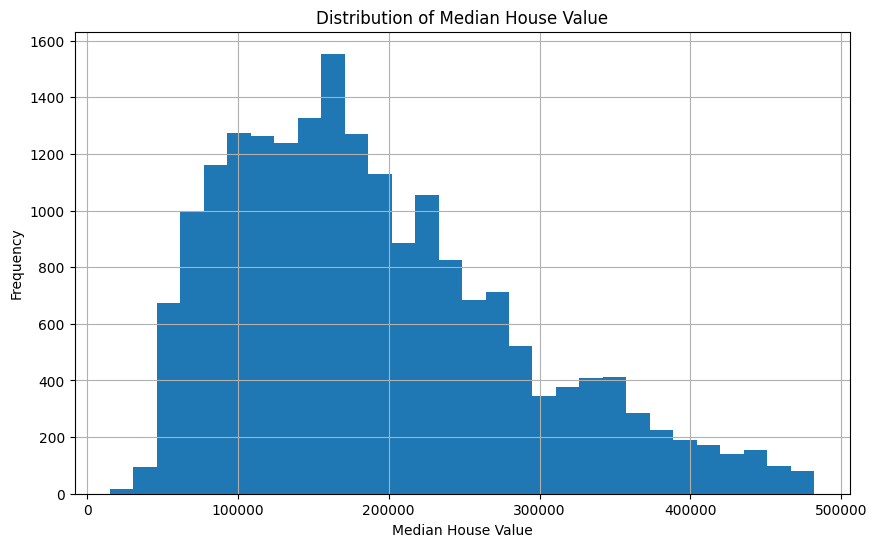

In [ ]:

import matplotlib.pyplot as plt

df['median_house_value'].hist(bins=30, figsize=(10,6))
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

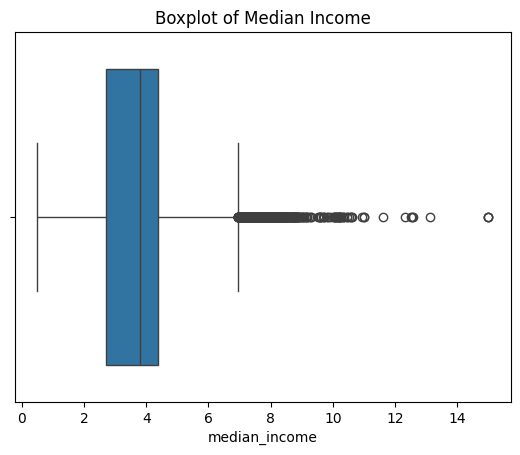

In [ ]:

import seaborn as sns

sns.boxplot(x=df['median_income'])
plt.title('Boxplot of Median Income')
plt.show()

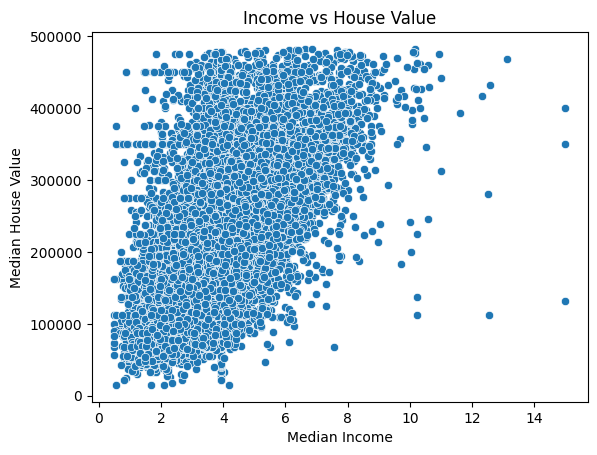

In [ ]:

sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

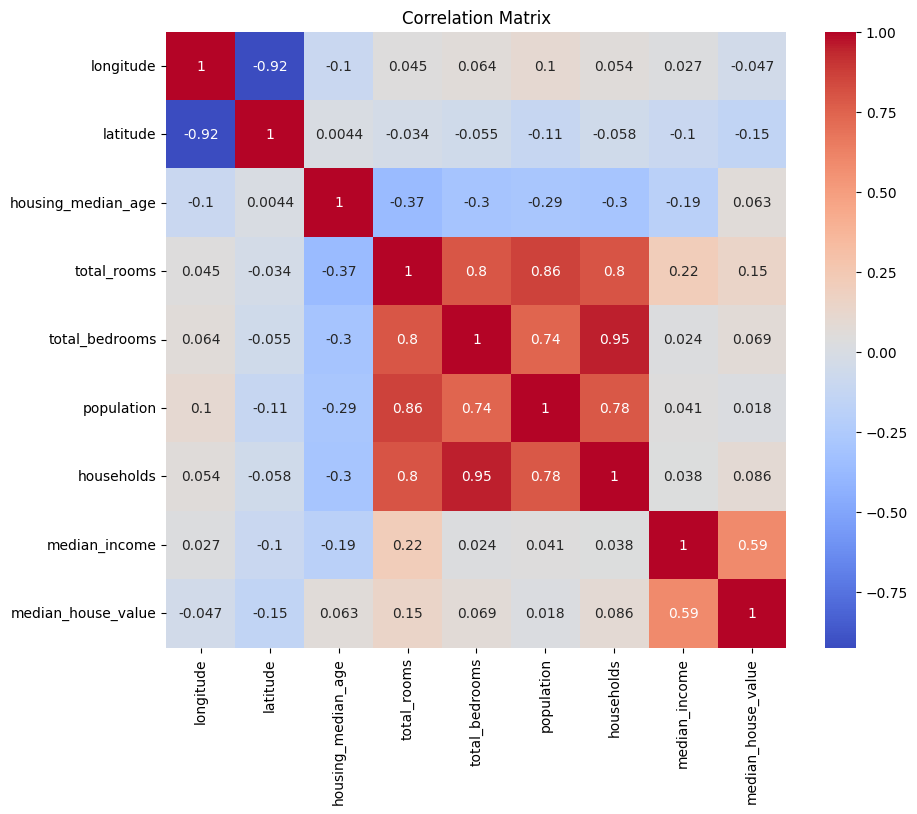

In [ ]:

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

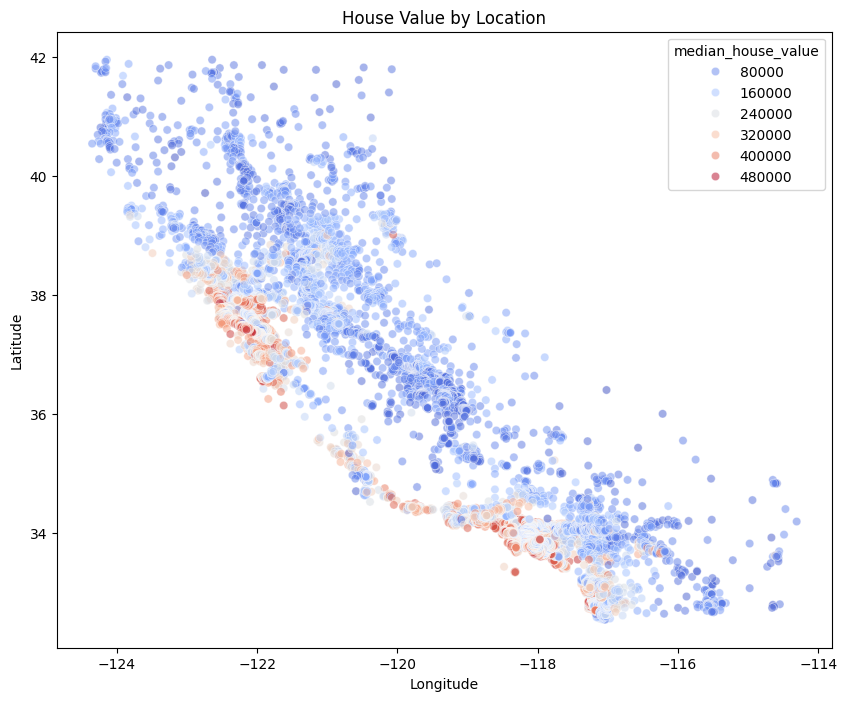

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, palette='coolwarm', alpha=0.5)
plt.title('House Value by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

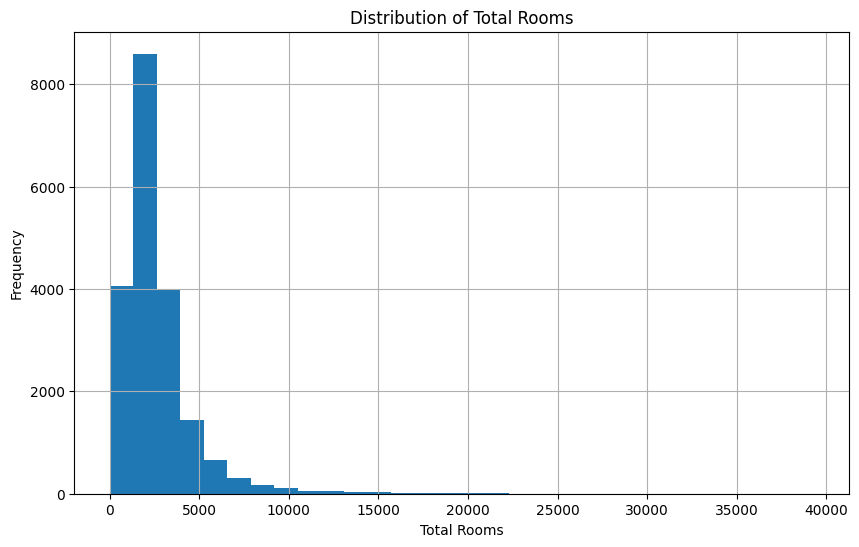

In [ ]:

df['total_rooms'].hist(bins=30, figsize=(10,6))
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rooms')
plt.show()

In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print(df_scaled.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.020457   
1   0.212151  0.565356            0.392157     0.180503        0.177835   
2   0.210159  0.564293            1.000000     0.037260        0.030284   
3   0.209163  0.564293            1.000000     0.032352        0.037532   
4   0.209163  0.564293            0.542672     0.041330        0.044781   

   population  households  median_income  median_house_value  
0    0.008941    0.023152       0.539668            0.936644  
1    0.067210    0.212099       0.538027            0.735232  
2    0.013818    0.032674       0.466028            0.721533  
3    0.015555    0.040515       0.354699            0.698417  
4    0.039853    0.047984       0.230776            0.700343  


In [ ]:
df_scaled.to_csv("housing2_normalized.csv", index=False)